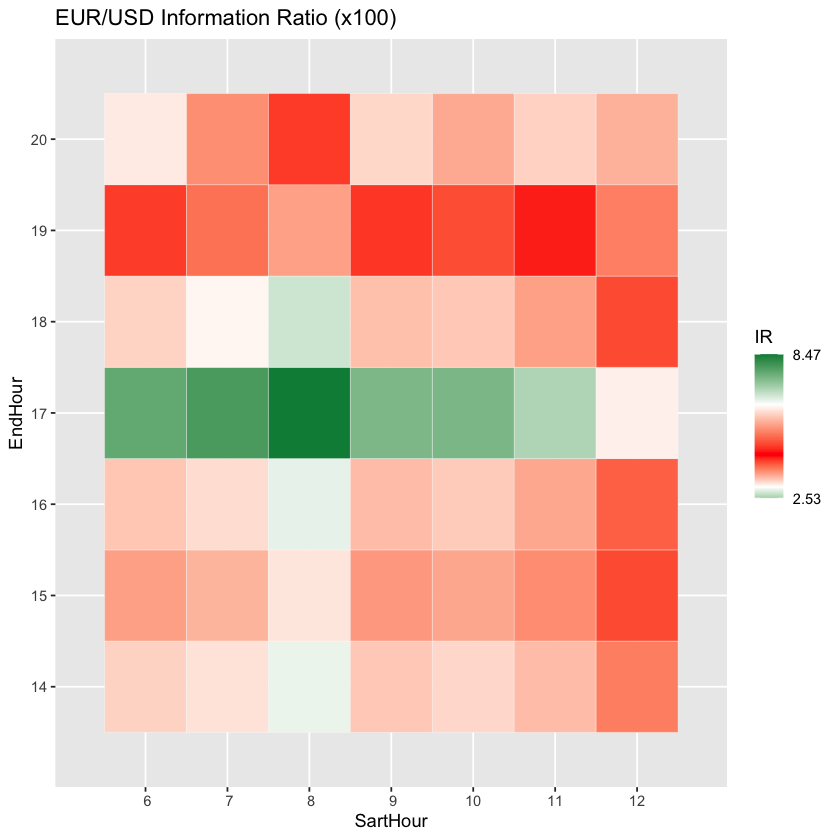

In [11]:
# required.packages <- c('tidyr', 'ggplot2')
# new.packages <- required.packages[!(required.packages %in% installed.packages()[,"Package"])]
# if(length(new.packages)) install.packages(new.packages, repos='http://cran.us.r-project.org')

library(tidyr)
library(ggplot2)

# location of Zorro performance report
path <- "C:/Users/Kris/Zorro/Log/"
file <- "intraday_reversal_ic.txt"

# load component results into dataframe
lines <- readLines(paste0(file))
start_line <- grep("Information Ratio", lines) + 1
end_line <- grep("Year Jan Feb", lines) - 1
perf <- lines[start_line:end_line]
perf <- read.csv(text=perf, header=FALSE, sep=" ")
colnames(perf) <- c("ID", "IR")
perf <- separate(data=perf, col=ID, into=c("Asset", "Algo", "SartHour", "EndHour"), sep="-")
perf$SartHour <- as.numeric(perf$SartHour)
perf$EndHour <- as.numeric(perf$EndHour)

# single heatmap
asset <- unique(perf$Asset)
ggplot(perf, aes(SartHour, EndHour)) + 
  geom_tile(aes(fill = IR), colour = "white") + 
  scale_x_discrete(limits=c(min(perf$SartHour):max(perf$SartHour))) +
  scale_y_discrete(limits=c(min(perf$EndHour):max(perf$EndHour))) +
  scale_fill_gradientn(colours = c("red", "white", "springgreen4"),
                       values = scales::rescale((c(min(perf$IR), -0.00000001, 0.00000001, max(perf$IR)))), 
                       breaks = c(min(perf$IR), 0, max(perf$IR)), 
                       label = c(min(perf$IR), 0, max(perf$IR)),
                       guide = guide_colourbar(nbin = 1000)) + 
  ggtitle(paste0(asset, " Information Ratio (x100)"))

ggsave(paste0(gsub("/", "", asset), "-ir-heatmap.png"), height=6, width=6)